In [2]:
framingham = read.csv("framingham.csv")

In [30]:
summary(framingham)

      male             age          education     currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.000   Median :0.0000  
 Mean   :0.4292   Mean   :49.58   Mean   :1.979   Mean   :0.4941  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.000   Max.   :1.0000  
                                  NA's   :105                     
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 9.006   Mean   :0.02962   Mean   :0.005896   Mean   :0.3106  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.0000

In [9]:
str(framingham)


'data.frame':	4240 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


In [10]:
library(caTools)

In [11]:
set.seed(1000)

You typically want to put somewhere between 50% and 80%
of the data in the train

In [12]:
split = sample.split(framingham$TenYearCHD,SplitRatio = 0.65)

In [13]:
train = subset(framingham, split == TRUE)

In [14]:
str(train)

'data.frame':	2756 obs. of  16 variables:
 $ male           : int  1 1 0 0 0 0 1 0 0 1 ...
 $ age            : int  39 48 61 43 63 45 43 50 43 46 ...
 $ education      : int  4 1 3 2 1 2 1 1 2 1 ...
 $ currentSmoker  : int  0 1 1 0 0 1 1 0 0 1 ...
 $ cigsPerDay     : int  0 20 30 0 0 20 30 0 0 15 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 1 1 0 0 1 0 0 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 245 225 228 205 313 225 254 247 294 ...
 $ sysBP          : num  106 128 150 180 138 ...
 $ diaBP          : num  70 80 95 110 71 71 107 76 88 94 ...
 $ BMI            : num  27 25.3 28.6 30.3 33.1 ...
 $ heartRate      : int  80 75 65 77 60 79 93 75 72 98 ...
 $ glucose        : int  77 70 103 99 85 78 88 76 61 64 ...
 $ TenYearCHD     : int  0 0 1 0 1 0 0 0 0 0 ...


In [16]:
test = subset(framingham, split == FALSE)

In [17]:
framinghamLog = glm(TenYearCHD~., data = train, family = binomial)

In [18]:
summary(framinghamLog)


Call:
glm(formula = TenYearCHD ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8487  -0.6007  -0.4257  -0.2842   2.8369  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -7.886574   0.890729  -8.854  < 2e-16 ***
male             0.528457   0.135443   3.902 9.55e-05 ***
age              0.062055   0.008343   7.438 1.02e-13 ***
education       -0.058923   0.062430  -0.944  0.34525    
currentSmoker    0.093240   0.194008   0.481  0.63080    
cigsPerDay       0.015008   0.007826   1.918  0.05514 .  
BPMeds           0.311221   0.287408   1.083  0.27887    
prevalentStroke  1.165794   0.571215   2.041  0.04126 *  
prevalentHyp     0.315818   0.171765   1.839  0.06596 .  
diabetes        -0.421494   0.407990  -1.033  0.30156    
totChol          0.003835   0.001377   2.786  0.00533 ** 
sysBP            0.011344   0.004566   2.485  0.01297 *  
diaBP           -0.004740   0.008001  -0.592  0

In [21]:
predictTest = predict(framinghamLog, type = "response" , newdata = test)

In [22]:
summary(predictTest)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.01641 0.06603 0.11430 0.15010 0.20080 0.72960     211 

In [24]:
table(test$TenYearCHD, predictTest>0.5)

   
    FALSE TRUE
  0  1069    6
  1   187   11

In [25]:
#accuracy
(1069+11)/(1069+11+6+187)

[1] 0.8483896

In [28]:
#baseline
1-mean(test$TenYearCHD,na.rm = TRUE)

[1] 0.8483827

In [29]:
(1069+6)/(1069+11+6+187)

[1] 0.8444619

In [31]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [32]:
ROCRPred = prediction(predictTest, test$TenYearCHD)

In [33]:
ROCRPerf = performance(ROCRPred,"tpr","fpr")

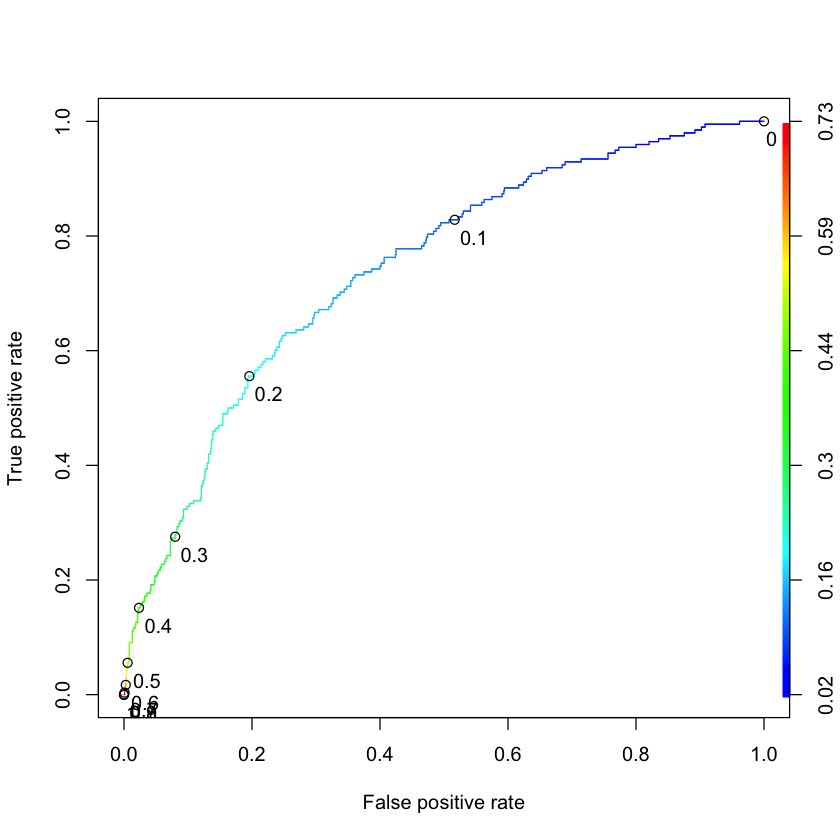

In [35]:
plot(ROCRPerf, colorize = TRUE, print.cutoffs.at = seq(0,1,0.1), text.adj=c(-0.2,1.7))

In [37]:
auc = as.numeric(performance(ROCRPred, "auc")@y.values)



In [38]:
auc

[1] 0.7421095

In [39]:
11/(11+187)

[1] 0.05555556

In [40]:
1069/(1069+6)

[1] 0.9944186

In [41]:
table(test$TenYearCHD,predictTest>0.2)

   
    FALSE TRUE
  0   865  210
  1    88  110

In [43]:
sensitivity = 110/(110+88)

In [44]:
sensitivity

[1] 0.5555556

In [45]:
specificity = 865/(865+210)

In [46]:
specificity

[1] 0.8046512

In [47]:
#accuracy
(865+110)/(865+210+88+110)

[1] 0.7659073